In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "ecommerce_order_data.csv"  
df = pd.read_csv(file_path)


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Basic statistics for each payment method

In [3]:
payment_analysis = df.groupby('Payment_Method').agg({
    'Order_Value': ['mean', 'sum'],
    'RTO': 'sum'
})
payment_analysis.columns = ['Avg_Order_Value', 'Total_Revenue', 'Total_RTO']


Payment Method Analysis:
                 Avg_Order_Value  Total_Revenue  Total_RTO   RTO_Rate
Payment_Method                                                      
COD                 1373.051020         134559         26  26.530612
Prepaid             1203.509804         122758         28  27.450980


/var/folders/dj/_15wr0wd54s710c7ndzf696c0000gn/T/ipykernel_5544/648437294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_analysis.index, y=payment_analysis['RTO_Rate'], palette="viridis")


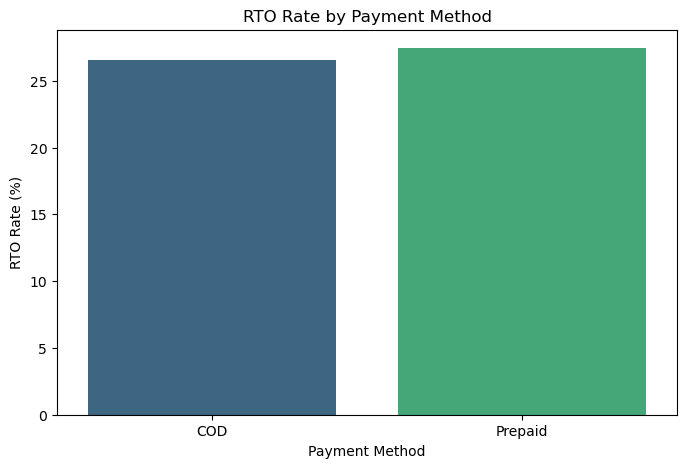

In [4]:
# Calculate RTO rate
payment_analysis['RTO_Rate'] = (payment_analysis['Total_RTO'] / df['Payment_Method'].value_counts()) * 100

print("Payment Method Analysis:\n", payment_analysis)

# Visualizing the RTO rate
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_analysis.index, y=payment_analysis['RTO_Rate'], palette="viridis")
plt.title("RTO Rate by Payment Method")
plt.ylabel("RTO Rate (%)")
plt.xlabel("Payment Method")
plt.show()

In [5]:
# Profitability analysis (assuming a fixed cost for RTOs)
RTO_cost = 200 
profit_analysis = payment_analysis.copy()
profit_analysis['Net_Revenue'] = profit_analysis['Total_Revenue'] - (profit_analysis['Total_RTO'] * RTO_cost)

print("Profitability Analysis:\n", profit_analysis)


Profitability Analysis:
                 Avg_Order_Value  Total_Revenue  Total_RTO   RTO_Rate  \
Payment_Method                                                         
COD                 1373.051020         134559         26  26.530612   
Prepaid             1203.509804         122758         28  27.450980   

                Net_Revenue  
Payment_Method               
COD                  129359  
Prepaid              117158  


/var/folders/dj/_15wr0wd54s710c7ndzf696c0000gn/T/ipykernel_5544/2142913410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_analysis.index, y=profit_analysis['Net_Revenue'], palette="coolwarm")


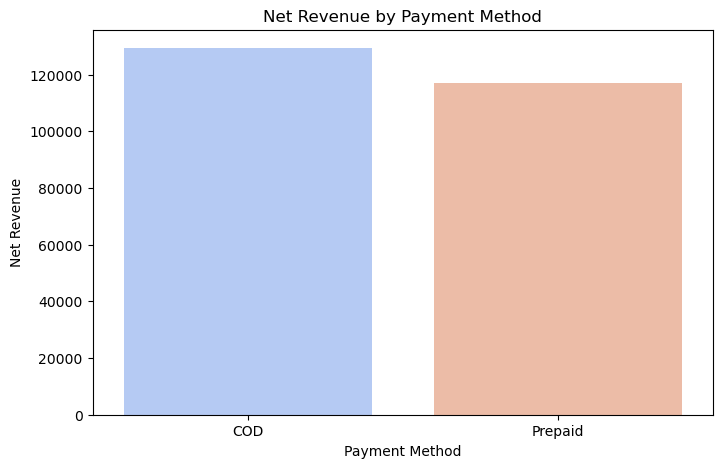

The COD model is more profitable.


In [6]:

# Visualizing Net Revenue
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_analysis.index, y=profit_analysis['Net_Revenue'], palette="coolwarm")
plt.title("Net Revenue by Payment Method")
plt.ylabel("Net Revenue")
plt.xlabel("Payment Method")
plt.show()

# Conclusion based on analysis
if profit_analysis.loc['Prepaid', 'Net_Revenue'] > profit_analysis.loc['COD', 'Net_Revenue']:
    print("The prepaid model is more profitable.")
else:
    print("The COD model is more profitable.")